In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df=pd.read_csv('insurance_major.csv')#importing csv file
df

,age,sex,bmi,children,smoker,region,charges
0,19.000000,female,27.900000,0.000000,yes,southwest,16884.924000
1,18.000000,male,33.770000,1.000000,no,southeast,1725.552300
2,28.000000,male,33.000000,3.000000,no,southeast,4449.462000
3,33.000000,male,22.705000,0.000000,no,northwest,21984.470610
4,32.000000,male,28.880000,0.000000,no,northwest,3866.855200
...,...,...,...,...,...,...,...
36333,38.406767,male,32.751083,0.998014,yes,northeast,37462.983440
36334,51.183515,female,40.104116,0.000000,no,northeast,9775.269170
36335,39.435406,male,28.993324,0.974506,yes,northeast,21363.237439
36336,22.984995,female,26.413139,0.000000,no,southeast,2519.819757


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36338 entries, 0 to 36337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       36338 non-null  float64
 1   sex       36338 non-null  object 
 2   bmi       36338 non-null  float64
 3   children  36338 non-null  float64
 4   smoker    36338 non-null  object 
 5   region    36338 non-null  object 
 6   charges   36338 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.9+ MB


In [3]:
df.describe()


,age,bmi,children,charges
count,36338.000000,36338.000000,36338.000000,36338.000000
mean,39.252444,30.690186,1.091488,13356.866130
std,14.150571,6.200387,1.205834,12139.571163
min,17.100528,15.313857,0.000000,1066.266410
25%,26.502815,26.242186,0.000000,4774.072330
50%,39.211758,30.447155,0.979421,9473.924643
75%,51.315201,34.799821,1.990575,16731.105764
max,67.194220,55.730024,5.249547,66926.033784


In [4]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

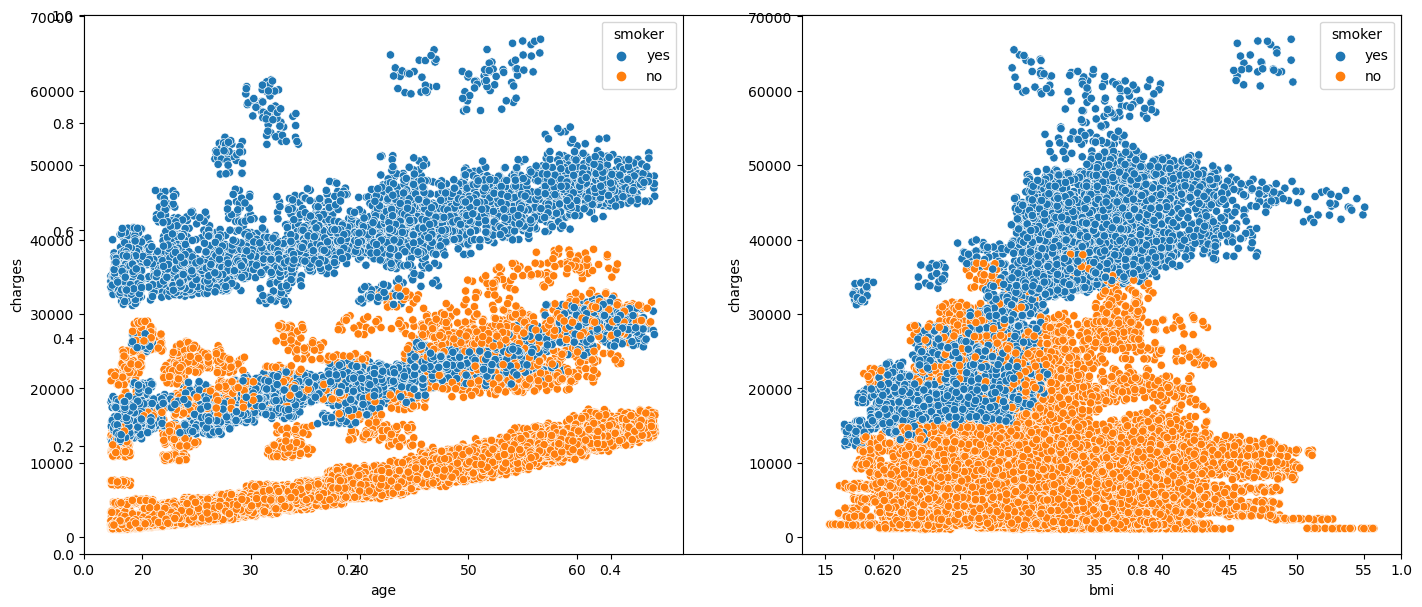

In [5]:
import seaborn as sns

features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()




In [6]:
df.drop_duplicates(inplace=True)


<Axes: >

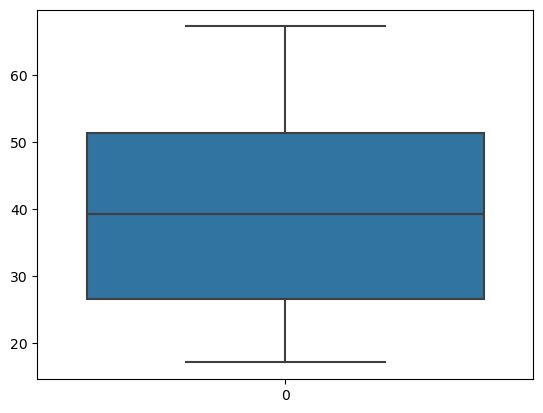

In [7]:
sns.boxplot(df['age'])

<Axes: >

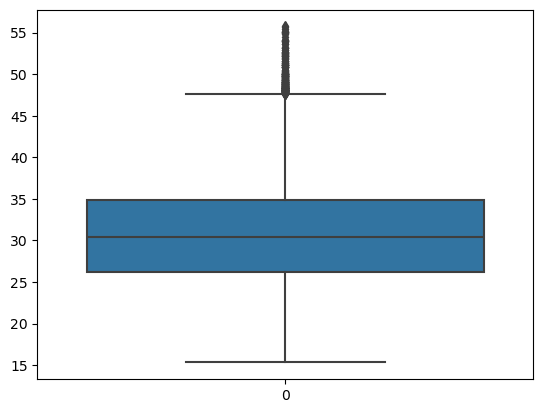

In [8]:
sns.boxplot(df['bmi'])


In [9]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)


13.405310718197498
47.6368135690815


In [10]:
!pip install feature_engine
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
!pip install feature_engine
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])





<Axes: >

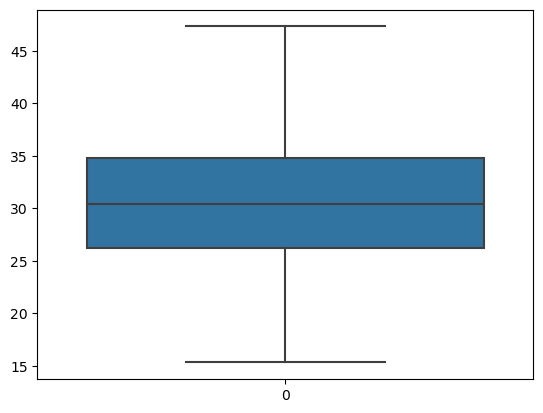

In [11]:
sns.boxplot(df['bmi'])

In [12]:
df['bmi'].skew()
df['age'].skew()


0.06725409096776018

In [13]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})


In [14]:
df


,age,sex,bmi,children,smoker,region,charges
0,19.000000,1,27.900000,0.000000,1,3,16884.924000
1,18.000000,0,33.770000,1.000000,0,2,1725.552300
2,28.000000,0,33.000000,3.000000,0,2,4449.462000
3,33.000000,0,22.705000,0.000000,0,0,21984.470610
4,32.000000,0,28.880000,0.000000,0,0,3866.855200
...,...,...,...,...,...,...,...
36333,38.406767,0,32.751083,0.998014,1,1,37462.983440
36334,51.183515,1,40.104116,0.000000,0,1,9775.269170
36335,39.435406,0,28.993324,0.974506,1,1,21363.237439
36336,22.984995,1,26.413139,0.000000,0,2,2519.819757


In [15]:
df.corr()


,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.023830,0.119429,0.036076,-0.037420,0.003553,0.284851
sex,0.023830,1.000000,-0.043030,-0.016543,-0.070545,-0.004630,-0.052421
bmi,0.119429,-0.043030,1.000000,0.011657,0.000062,0.155137,0.196867
children,0.036076,-0.016543,0.011657,1.000000,-0.000539,-0.009587,0.056976
smoker,-0.037420,-0.070545,0.000062,-0.000539,1.000000,0.017026,0.786941
region,0.003553,-0.004630,0.155137,-0.009587,0.017026,1.000000,0.012296
charges,0.284851,-0.052421,0.196867,0.056976,0.786941,0.012296,1.000000


In [16]:
X=df.drop(['charges'],axis=1)
Y=df[['charges']]



In [17]:
X

,age,sex,bmi,children,smoker,region
0,19.000000,1,27.900000,0.000000,1,3
1,18.000000,0,33.770000,1.000000,0,2
2,28.000000,0,33.000000,3.000000,0,2
3,33.000000,0,22.705000,0.000000,0,0
4,32.000000,0,28.880000,0.000000,0,0
...,...,...,...,...,...,...
36333,38.406767,0,32.751083,0.998014,1,1
36334,51.183515,1,40.104116,0.000000,0,1
36335,39.435406,0,28.993324,0.974506,1,1
36336,22.984995,1,26.413139,0.000000,0,2


In [18]:
Y

,charges
0,16884.924000
1,1725.552300
2,4449.462000
3,21984.470610
4,3866.855200
...,...
36333,37462.983440
36334,9775.269170
36335,21363.237439
36336,2519.819757


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20, random_state=62)

In [20]:
print(X_train,Y_train,X_test,Y_test)

             age  sex        bmi  children  smoker  region
21751  56.506366    0  33.190856  0.000000       0       0
1009   51.000000    0  27.740000  1.000000       0       1
8363   24.053376    1  22.957985  0.000000       0       1
29885  61.501549    1  34.788212  0.000000       0       3
22064  60.586071    0  26.738667  0.000000       0       2
...          ...  ...        ...       ...     ...     ...
36108  52.231484    0  29.571465  0.000000       0       0
2164   28.112671    0  31.933926  1.966571       0       0
9810   65.804028    1  31.114170  0.000000       0       3
15385  56.344970    1  32.849769  1.963862       0       0
9747   55.735265    1  22.773683  0.000000       0       2

[29069 rows x 6 columns]             charges
21751  11248.073512
1009    9957.721600
8363    3097.691351
29885  13656.126030
22064  12085.621471
...             ...
36108  10071.943228
2164   18691.271706
9810   14320.826166
15385  12358.045334
9747   12265.361847

[29069 rows x 1 columns] 

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
X_test

array([[ 0.1652052 , -0.98629908, -0.59448963,  1.56683726,  1.96806013,
        -1.38897236],
       [ 1.28967674, -0.98629908,  1.01284497,  1.58942261, -0.50811456,
         1.34708765],
       [-1.53795376,  1.01389124,  1.10001122, -0.90283495, -0.50811456,
         0.43506765],
       ...,
       [ 1.48341383, -0.98629908, -0.30007166, -0.09043396, -0.50811456,
         1.34708765],
       [ 0.22975093, -0.98629908,  1.3936424 , -0.08824958, -0.50811456,
         0.43506765],
       [ 1.11903824, -0.98629908, -0.14096782, -0.90283495,  1.96806013,
        -0.47695236]])

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, Y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")

D:\intern\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest - MSE: 6902659.292164969, R2: 0.9531463420498919


In [24]:

import joblib
joblib.dump(rf_model, 'major.pkl')  # Replace with your model variable name


['major.pkl']

In [25]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.
